In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Aqui con pandas se lee el archivo y lo hace manipulable con python, la fundcion pd.read_csv es la que lee el archivo csv y lo convierte en un dataframe de pandas

In [99]:
df = pd.read_csv("../data/AQI_06-13.csv")

aqui el .head() es para ver las primeras filas del dataframe y asegurarse que se leyo correctamente el archivo, igual el .describe() es para ver estadisticas basicas del dataframe como conteo, media, desviacion estandar, minimos, maximos y percentiles

In [100]:
df.head()


,Categoría,Skiliket 3 - GYM-AQI,Skiliket 4 - Biblioteca-AQI,Skiliket 1 - TEC Salud-AQI,Skiliket 2 - Comedor Aulas IV-AQI,Skiliket 5 - Cafeteria-AQI,Skiliket 6 - EIAD-AQI,Skiliket 7 - Aulas II - Lab Plugdesign-AQI,Skiliket 8 - Edificio VI Prepa-AQI,Skiliket 9 - Aulas IV-AQI,Skiliket 10 - Negocios-AQI
0,2026-01-06 00:00:08,0,5,0,0,2,0,0,0,0,0
1,2026-01-06 00:00:38,0,0,0,0,0,0,0,5,0,0
2,2026-01-06 00:00:53,4,0,0,0,0,0,0,0,0,0
3,2026-01-06 00:01:08,0,5,0,0,2,0,0,0,0,0
4,2026-01-06 00:01:38,0,0,0,0,0,0,0,5,0,0


In [101]:
df.describe()

,Skiliket 3 - GYM-AQI,Skiliket 4 - Biblioteca-AQI,Skiliket 1 - TEC Salud-AQI,Skiliket 2 - Comedor Aulas IV-AQI,Skiliket 5 - Cafeteria-AQI,Skiliket 6 - EIAD-AQI,Skiliket 7 - Aulas II - Lab Plugdesign-AQI,Skiliket 8 - Edificio VI Prepa-AQI,Skiliket 9 - Aulas IV-AQI,Skiliket 10 - Negocios-AQI
count,36765.000000,36765.000000,36765.0,36765.0,36765.000000,36765.0,36765.0,36765.000000,36765.0,36765.0
mean,1.120169,1.259731,0.0,0.0,0.565973,0.0,0.0,1.261689,0.0,0.0
std,1.909048,2.129503,0.0,0.0,1.038551,0.0,0.0,2.114689,0.0,0.0
min,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
25%,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
50%,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
75%,2.000000,3.000000,0.0,0.0,1.000000,0.0,0.0,3.000000,0.0,0.0
max,5.000000,5.000000,0.0,0.0,5.000000,0.0,0.0,5.000000,0.0,0.0


Qué representa el 0??, suponemos que representa una ausencia de cambio en el nivel de ruido


lo primero que hare es super importante que es la variable "Categoría" que aparece en el dataframe conbertirla a formato datetime y ponerla como indice del dataframe para facilitar el manejo de series de tiempo, cespues dropeo la columna "Categoría" ya que ahora esta como indice y no es necesaria en el dataframe

In [102]:
df['timestamp'] = pd.to_datetime(df['Categoría'])
df = df.drop(columns=['Categoría']).set_index('timestamp')



como estoy en un notebook de jupyter solo pongo el nombre del dataframe para que me muestre todo el contenido (en realidad )

In [103]:
df

,Skiliket 3 - GYM-AQI,Skiliket 4 - Biblioteca-AQI,Skiliket 1 - TEC Salud-AQI,Skiliket 2 - Comedor Aulas IV-AQI,Skiliket 5 - Cafeteria-AQI,Skiliket 6 - EIAD-AQI,Skiliket 7 - Aulas II - Lab Plugdesign-AQI,Skiliket 8 - Edificio VI Prepa-AQI,Skiliket 9 - Aulas IV-AQI,Skiliket 10 - Negocios-AQI
timestamp,,,,,,,,,,
2026-01-06 00:00:08,0,5,0,0,2,0,0,0,0,0
2026-01-06 00:00:38,0,0,0,0,0,0,0,5,0,0
2026-01-06 00:00:53,4,0,0,0,0,0,0,0,0,0
2026-01-06 00:01:08,0,5,0,0,2,0,0,0,0,0
2026-01-06 00:01:38,0,0,0,0,0,0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...
2026-01-13 17:12:11,0,0,0,0,0,0,0,0,0,0
2026-01-13 17:12:25,3,0,0,0,0,0,0,0,0,0
2026-01-13 17:13:54,0,5,0,0,0,0,0,5,0,0


ahora dropere las columnass que no tienen sensores o no sirven, en este caso al ser un db chiquito se repite que no tienen datos, pero en caso de que sea un db mas grande usare una funcion que que si detecta muchos nulos dropear la columna entera

In [104]:
cols_validas = df.columns[df.max() > 0]
df = df[cols_validas]


In [105]:
df.describe()

,Skiliket 3 - GYM-AQI,Skiliket 4 - Biblioteca-AQI,Skiliket 5 - Cafeteria-AQI,Skiliket 8 - Edificio VI Prepa-AQI
count,36765.000000,36765.000000,36765.000000,36765.000000
mean,1.120169,1.259731,0.565973,1.261689
std,1.909048,2.129503,1.038551,2.114689
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,1.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000


In [106]:
def mean_no_zeros(x: pd.Series) -> float:
    x = x[(x > 0) & x.notna()]
    return float(x.mean()) if len(x) else np.nan


Resample por minuto


In [107]:
df_min = df.resample('1min').apply(mean_no_zeros)
df_5min = df_min.resample("5min").mean()


#esto lo hago para guardar el dataset limpio y ya procesado y ver anomalios o cosas asi
df_min.to_csv("../data/data_test.csv", index=True)


In [108]:
df_min.head()

,Skiliket 3 - GYM-AQI,Skiliket 4 - Biblioteca-AQI,Skiliket 5 - Cafeteria-AQI,Skiliket 8 - Edificio VI Prepa-AQI
timestamp,,,,
2026-01-06 00:00:00,4.0,5.0,2.0,5.0
2026-01-06 00:01:00,4.0,5.0,2.0,5.0
2026-01-06 00:02:00,4.0,5.0,2.0,5.0
2026-01-06 00:03:00,4.0,5.0,2.0,5.0
2026-01-06 00:04:00,4.0,5.0,2.0,5.0


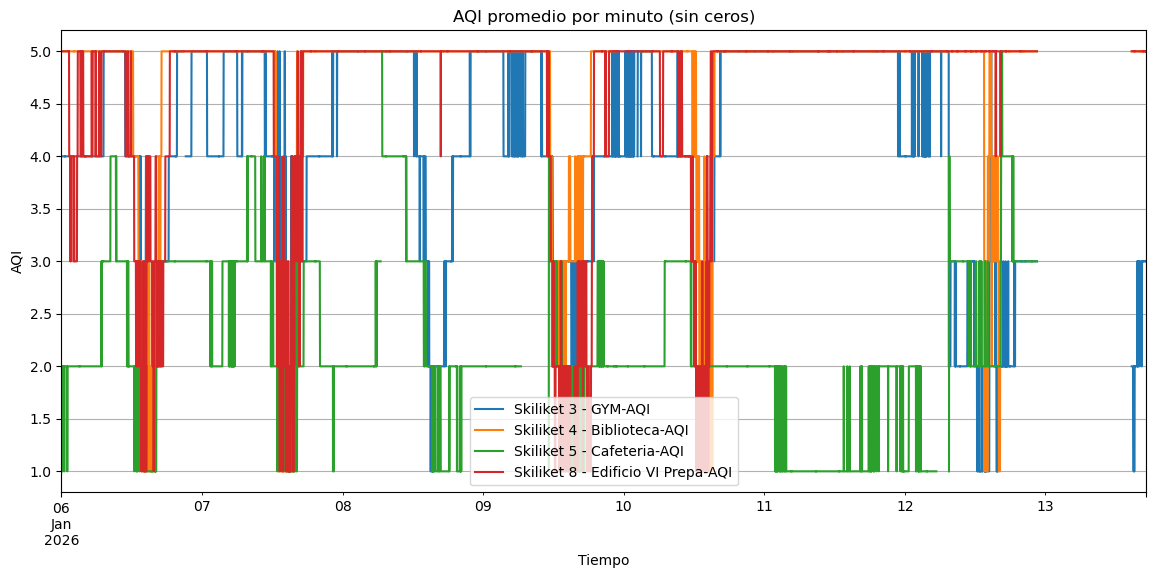

In [109]:
df_min.plot(figsize=(14,6))
plt.title("AQI promedio por minuto (sin ceros)")
plt.xlabel("Tiempo")
plt.ylabel("AQI")
plt.grid(True)
plt.show()


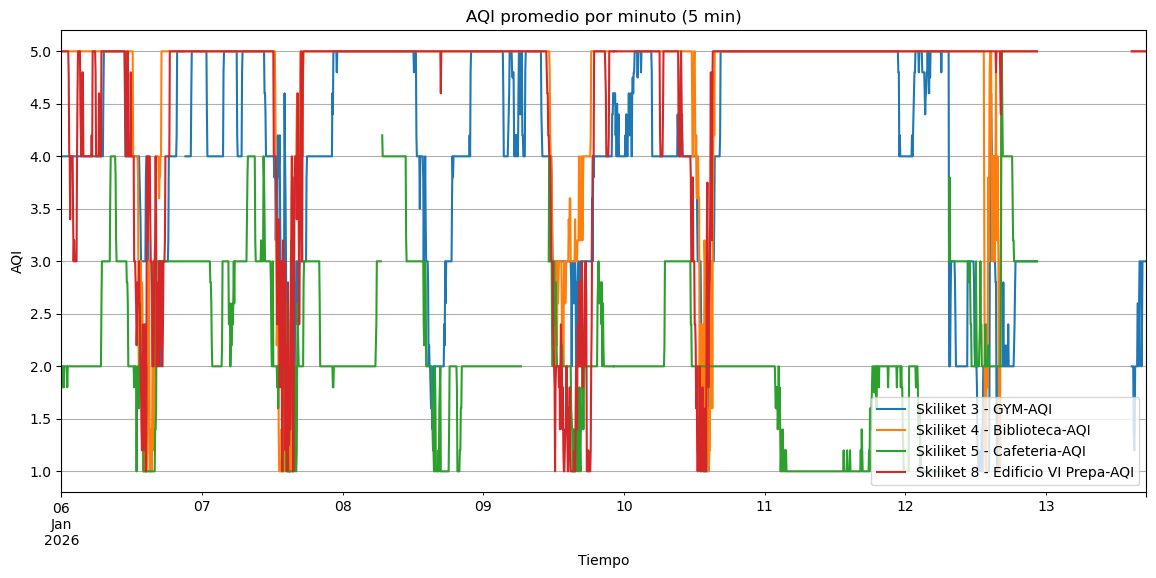

In [110]:
df_5min.plot(figsize=(14,6))
plt.title("AQI promedio por minuto (5 min)")
plt.xlabel("Tiempo")
plt.ylabel("AQI")
plt.grid(True)
plt.show()


Se puede mostrar todo junto en un solo grafico, pero para que se vea mejor lo hare por columnas individuales, igual mejor agarrare cada 5 min para reducir el ruido visual

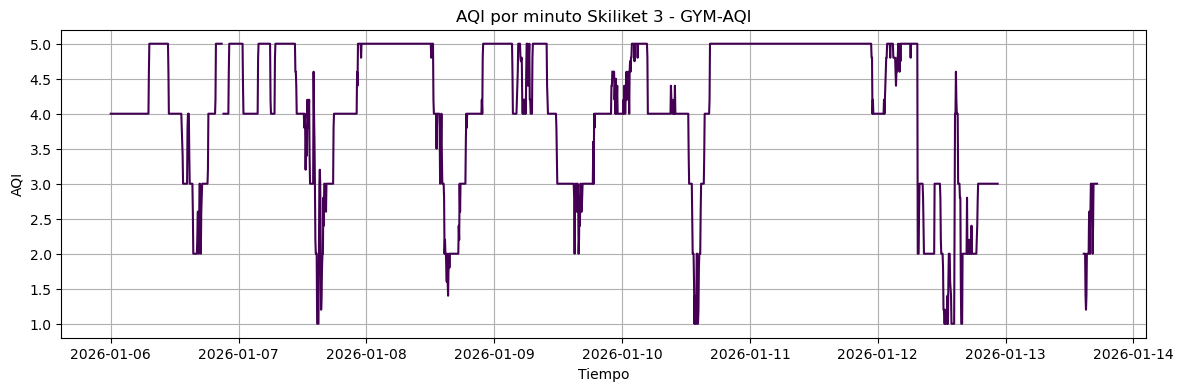

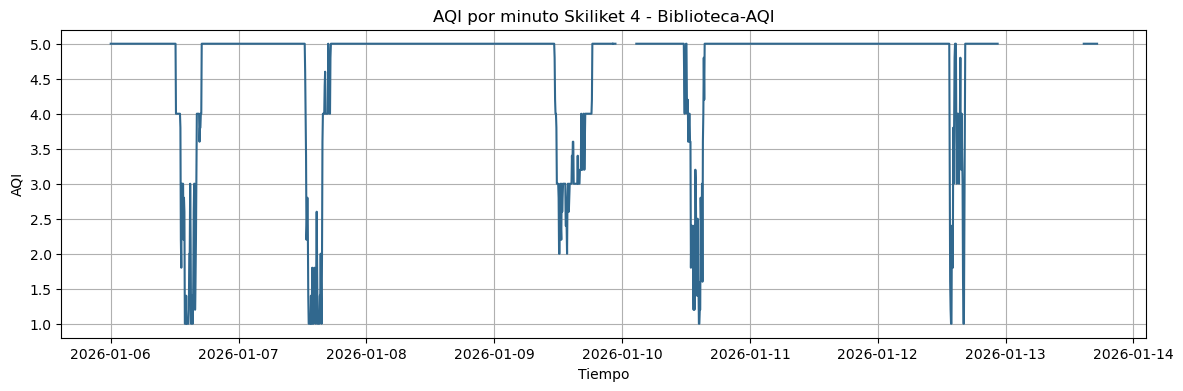

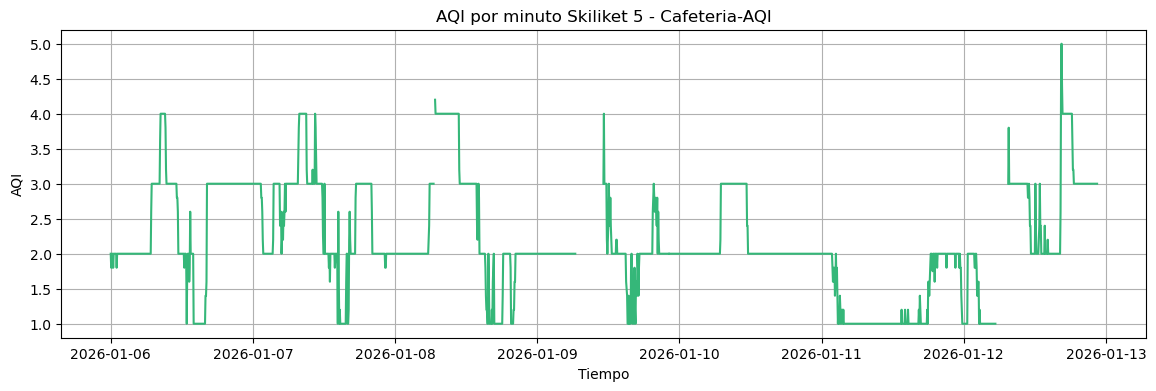

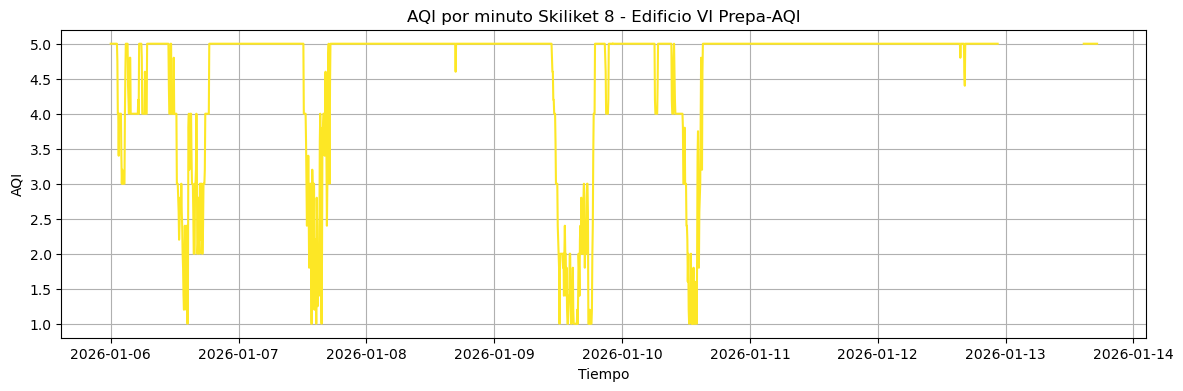

In [111]:
colors = plt.cm.viridis(np.linspace(0, 1, len(df_5min.columns)))

for col, c in zip(df_min.columns, colors):
    plt.figure(figsize=(14,4))
    plt.plot(df_5min.index, df_5min[col], color=c)
    plt.title(f"AQI por minuto {col}")
    plt.xlabel("Tiempo")
    plt.ylabel("AQI")
    plt.grid(True)
    plt.show()



Aqui lo pueden separar por una columna en especifico, en este caso elijo "Skiliket 8 - Edificio VI Prepa-AQI" pero puede ser cualquier otra columna que represente un sensor.


Igual propongo usar un suavizado con el rolling mean para reducir el ruido visual y ver mejor las tendencias en los datos. En este caso uso una ventana de 5 minutos para calcular la media movil. peor no creo aplicarlo

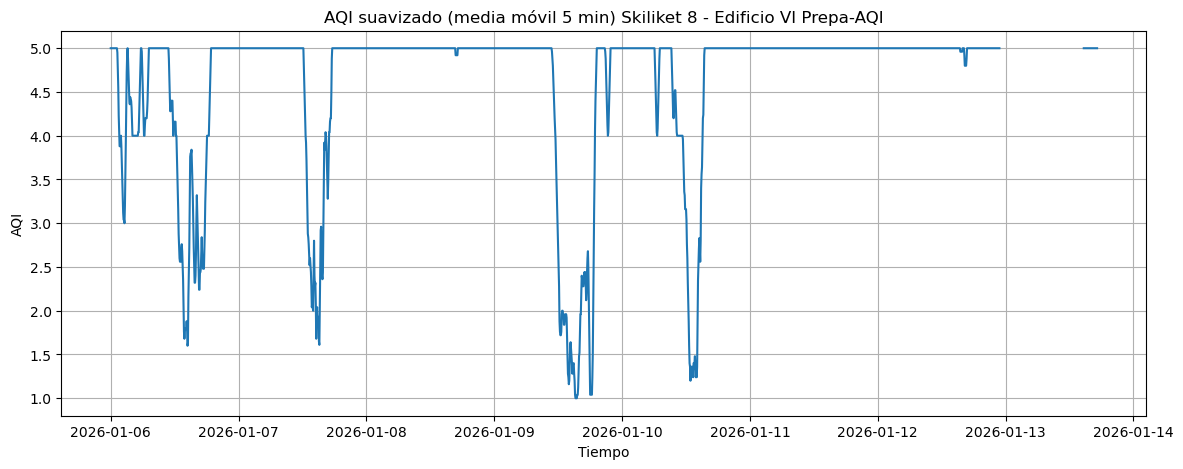

In [112]:
col = "Skiliket 8 - Edificio VI Prepa-AQI"

# media móvil (rolling)
df_smooth = df_5min[col].rolling(window=5, min_periods=1).mean()

plt.figure(figsize=(14,5))
plt.plot(df_smooth.index, df_smooth)
plt.title(f"AQI suavizado (media móvil 5 min) {col}")
plt.xlabel("Tiempo")
plt.ylabel("AQI")
plt.grid(True)
plt.show()


Tambien usare la funcion para ver anomalias en los datos acerca de los 0s para ver si un sensor actua sospechoso (porque almenos en air quality no deberia haber 0s nunca)

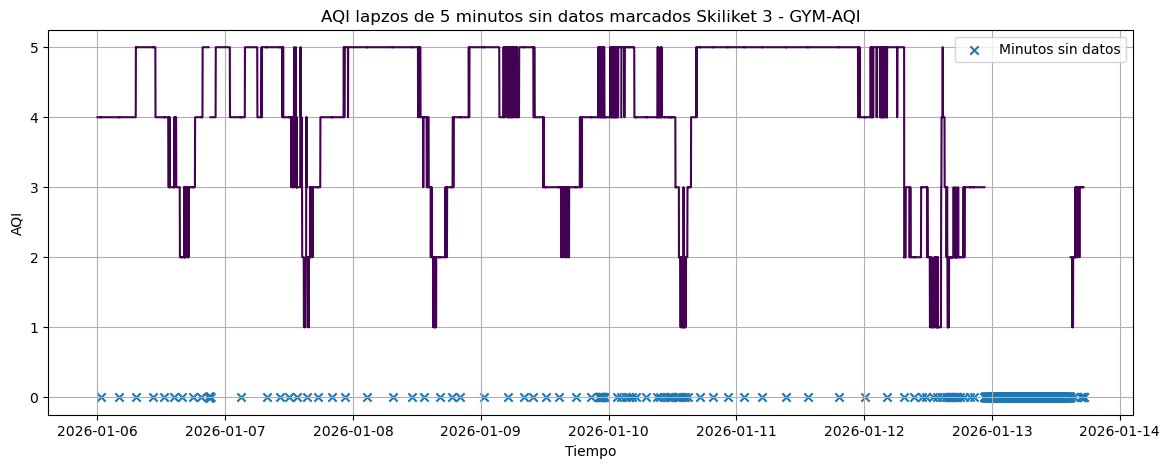

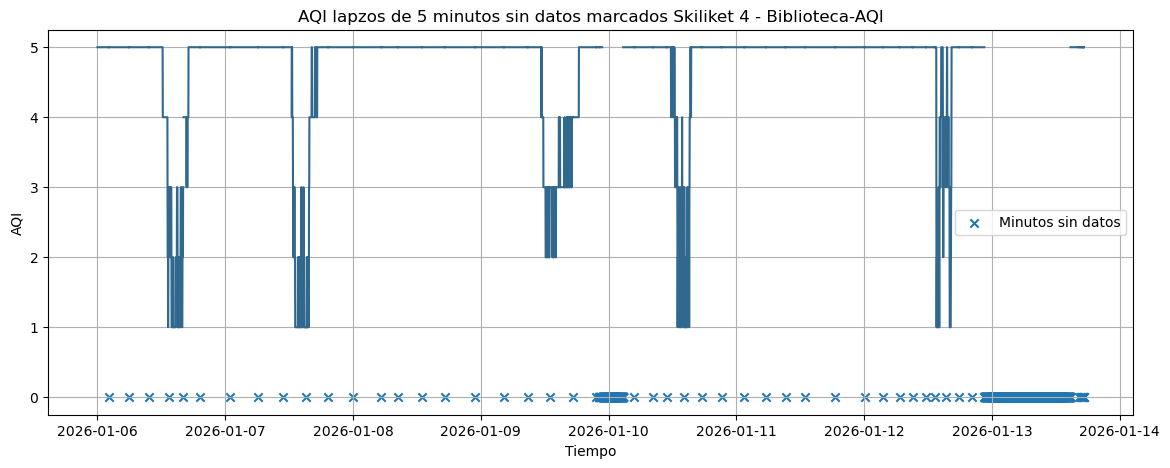

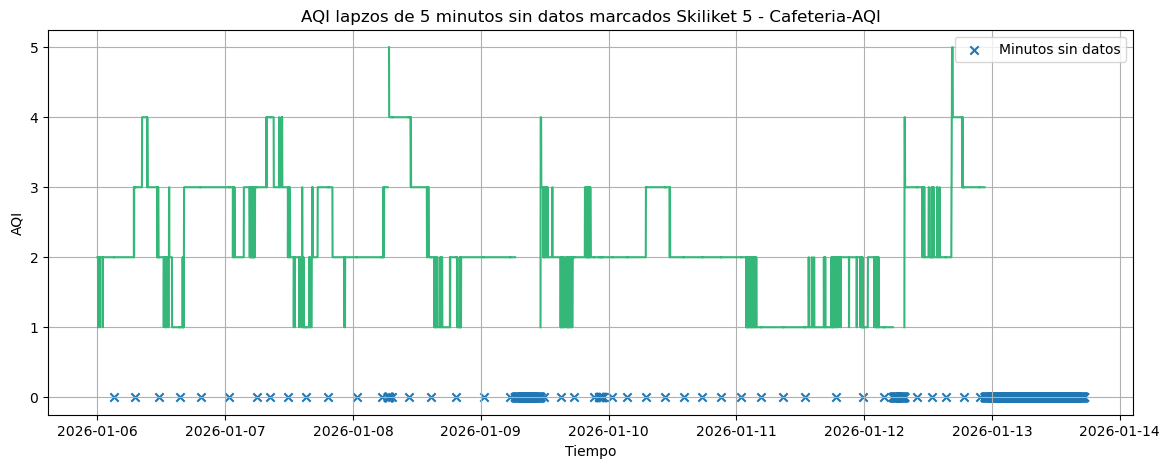

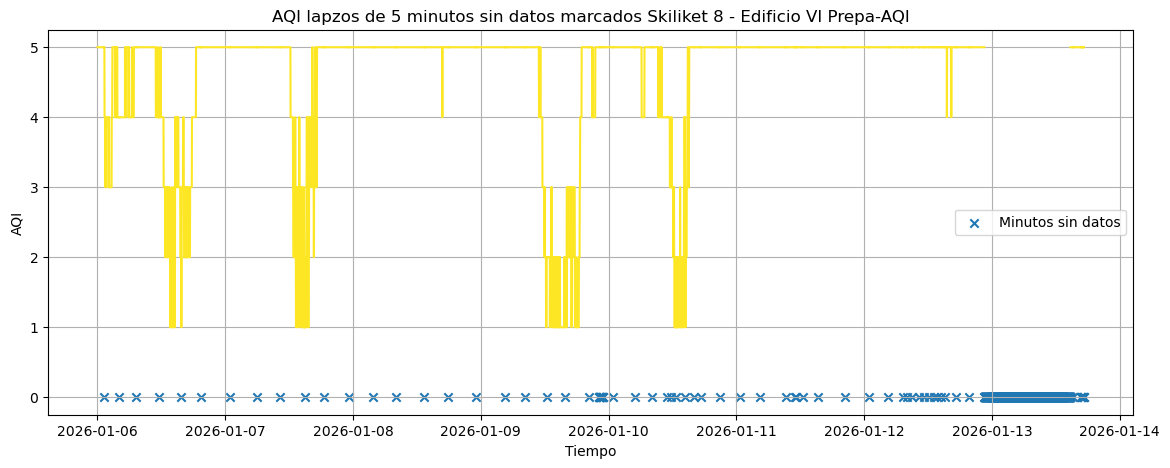

In [113]:
for col, c in zip(df_min.columns, colors):
    y = df_min[col]

    plt.figure(figsize=(14,5))
    plt.plot(df_min.index, df_min[col], color=c)

    # detectar minutos sin datos
    missing = y.isna()
    plt.scatter(
        y.index[missing],
        np.zeros(missing.sum()),
        label="Minutos sin datos",
        marker="x"
    )

    
    plt.title(f"AQI lapzos de 5 minutos sin datos marcados {col}")
    plt.xlabel("Tiempo")
    plt.ylabel("AQI")
    plt.legend()
    plt.grid(True)
    plt.show()


